# Claim Severity Modeling using Generalized Linear Models

**Project:** PRISM – Predictive & Research-based Insurance Statistical Modeling

## Objective
To model claim severity using a Gamma GLM and interpret key risk drivers of claim cost.

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
sev = pd.read_csv(
    "/content/drive/MyDrive/freMTPL2sev.csv"
)

sev.head()


,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00


In [14]:
sev = sev.rename(columns={
    "IDpol": "policy_id",
    "ClaimAmount": "claim_amount"
})

In [15]:
sev.columns

Index(['policy_id', 'claim_amount'], dtype='object')

In [16]:
sev["claim_amount"].describe()

,claim_amount
count,2.663900e+04
mean,2.278536e+03
std,2.929748e+04
min,1.000000e+00
25%,6.868100e+02
50%,1.172000e+03
75%,1.228080e+03
max,4.075401e+06


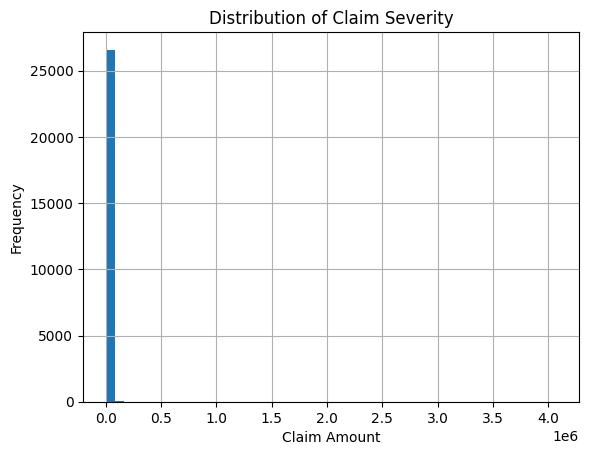

In [17]:
sev["claim_amount"].hist(bins=50)
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Claim Severity")
plt.show()

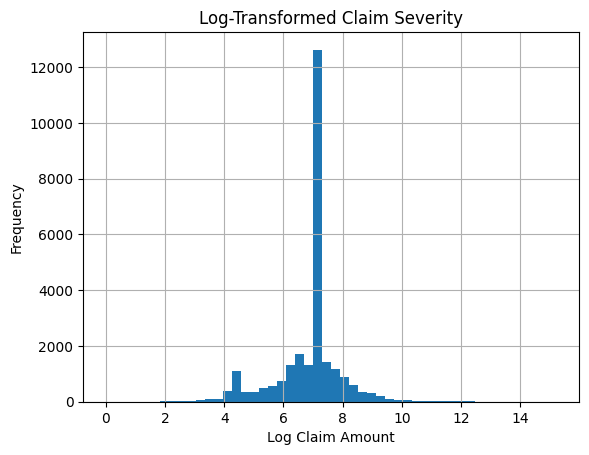

In [18]:
np.log(sev["claim_amount"]).hist(bins=50)
plt.xlabel("Log Claim Amount")
plt.ylabel("Frequency")
plt.title("Log-Transformed Claim Severity")
plt.show()

### Severity Distribution Observations

Claim severity is positive and highly right-skewed with a long tail.  
After log transformation, the distribution becomes approximately symmetric,  
supporting the use of a Gamma distribution with log link for severity modeling.


In [19]:
gamma_model = smf.glm(
    formula="claim_amount ~ 1",
    data=sev,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

gamma_model.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           claim_amount   No. Observations:                26639
Model:                            GLM   Df Residuals:                    26638
Model Family:                   Gamma   Df Model:                            0
Link Function:                    log   Scale:                          165.33
Method:                          IRLS   Log-Likelihood:            -3.1958e+05
Date:                Sat, 17 Jan 2026   Deviance:                       46962.
Time:                        16:40:31   Pearson chi2:                 4.40e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7313      0.079     98.138      0.000       7.577       7.886
==============================================================================
"""

## Gamma GLM Results

A Gamma GLM with log link is fitted to model claim severity.  
The model estimates expected claim cost and provides an interpretable baseline for pricing.


In [20]:
# Expected severity from Gamma model
expected_severity = np.exp(gamma_model.params["Intercept"])
expected_severity


np.float64(2278.5363819963604)

## Pure Premium Construction

Pure Premium = Expected Frequency × Expected Severity  
This represents the expected claim cost per policy.


In [35]:
freq_pred = pd.read_csv("/content/drive/MyDrive/expected_frequency.csv")
freq_pred["pure_premium"] = freq_pred["expected_frequency"] * expected_severity
freq_pred.head()

,policy_id,expected_frequency,pure_premium
0,1.0,0.013382,30.492270
1,3.0,0.103044,234.790480
2,5.0,0.077559,176.721448
3,10.0,0.009803,22.337268
4,11.0,0.091498,208.481164


## Pure Premium Results

Pure Premium combines expected claim frequency and severity to estimate the expected cost per policy.  
This provides an interpretable and statistically grounded pricing framework for insurance risk.
